In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison

In [51]:
# For reproducibility, set a seed.
np.random.seed(42)

# Taking a sample of 25 observations which is random
sample = diabetes_data.sample(n=25)

In [52]:
# The mean and the largest value are calculated for the sample
mean_glucose_sample = sample['Glucose'].mean()
highest_glucose_sample = sample['Glucose'].max()

In [53]:
# The mean and highest values are calculated for the population
mean_glucose_p = diabetes_data['Glucose'].mean()
highest_glucose_p = diabetes_data['Glucose'].max()

In [54]:
# List the statistics
print("Sample Mean Glucose:", mean_glucose_sample)
print("Sample Highest Glucose:", highest_glucose_sample)
print("\nPopulation Mean Glucose:", mean_glucose_p)
print("Population Highest Glucose:", highest_glucose_p)

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


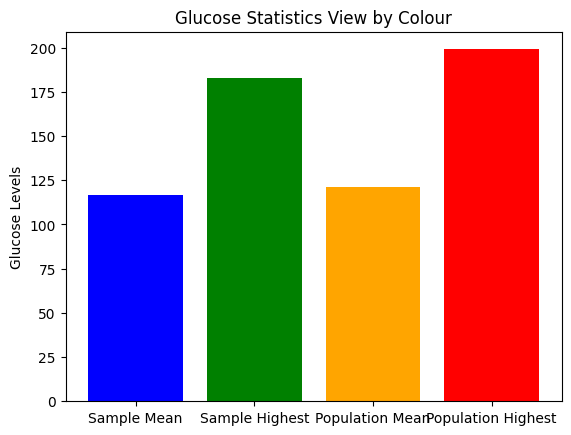

In [55]:
# Create a bar chart for comparison
labels = ['Sample Mean', 'Sample Highest', 'Population Mean', 'Population Highest']
values = [mean_glucose_sample, highest_glucose_sample, mean_glucose_p, highest_glucose_p]

plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Glucose Statistics View by Colour')
plt.ylabel('Glucose Levels')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

In [56]:
# Calculate the 98th percentile of BMI for the sample
bmi_98th_percentile_s= np.percentile(sample['BMI'], 98)

# Calculate the 98th percentile of BMI for the population
bmi_98th_percentile_p = np.percentile(diabetes_data['BMI'], 98)

In [57]:
# Display the percentiles
print("Sample 98th Percentile BMI:", bmi_98th_percentile_s)
print("Population 98th Percentile BMI:", bmi_98th_percentile_p)

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


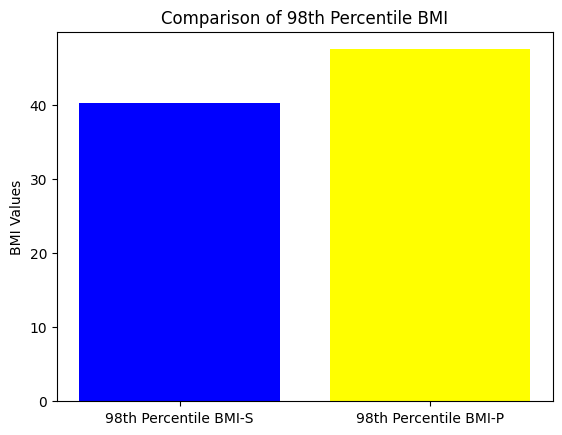

In [58]:
# Create a bar chart for comparison
labels = ['98th Percentile BMI-S', '98th Percentile BMI-P']
values = [bmi_98th_percentile_s, bmi_98th_percentile_p]

plt.bar(labels, values, color=['blue', 'yellow'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [59]:
# Number of bootstrap samples and size of each sample
num_samples = 500
sample_size = 150

In [60]:
# Initialize empty arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [61]:
# Perform bootstrap sampling
for i in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(diabetes_data['BloodPressure'], size=sample_size, replace=True)

    # Calculate mean, standard deviation, and 94th percentile for the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 94)

In [62]:
# Calculate population statistics for BloodPressure
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_dev_bp = diabetes_data['BloodPressure'].std()
population_percentile_94_bp = np.percentile(diabetes_data['BloodPressure'], 94)

In [63]:
# Display the population statistics
print("Mean BloodPressure for Population :", population_mean_bp)
print("Standard Deviation BloodPressure for Population :", population_std_dev_bp)
print("94th Percentile BloodPressure for Population :", population_percentile_94_bp)

Mean BloodPressure for Population : 69.10546875
Standard Deviation BloodPressure for Population : 19.355807170644777
94th Percentile BloodPressure for Population : 90.0


In [64]:
# Calculate mean, standard deviation, and 95th percentile for the bootstrap statistics
bootstrap_mean_mean = np.mean(bootstrap_means)
bootstrap_mean_std_dev = np.mean(bootstrap_std_devs)
bootstrap_mean_percentile_94 = np.mean(bootstrap_percentiles)

In [65]:
# Display the bootstrap statistics
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 95th Percentile BloodPressure:", bootstrap_mean_percentile_94)


Bootstrap Mean BloodPressure: 69.17696
Bootstrap Standard Deviation BloodPressure: 19.01902467947537
Bootstrap 95th Percentile BloodPressure: 90.06312


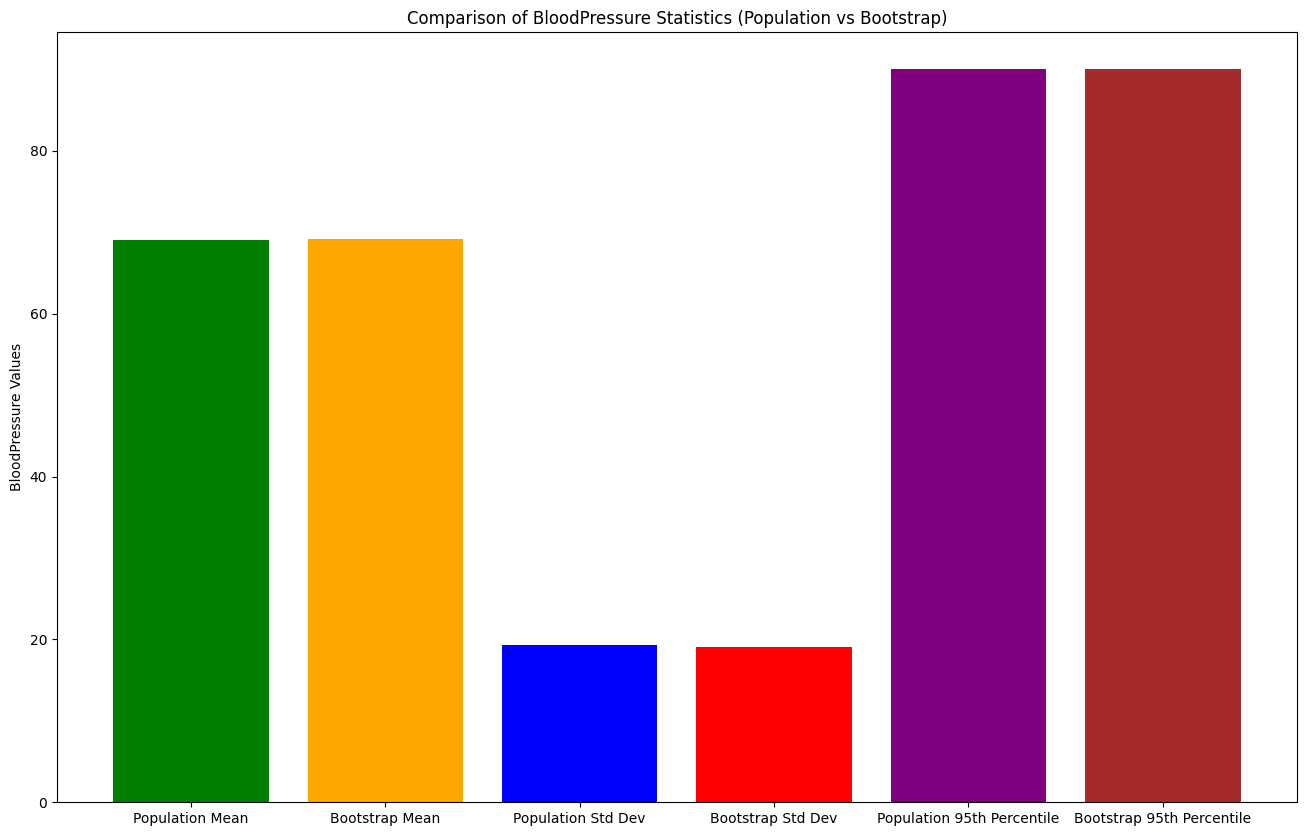

In [66]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [population_mean_bp, bootstrap_mean_mean, population_std_dev_bp, bootstrap_mean_std_dev, population_percentile_94_bp, bootstrap_mean_percentile_94]

plt.bar(labels, values, color=['green', 'orange', 'blue', 'red', 'purple', 'brown'])
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()